<a href="https://colab.research.google.com/github/ram130849/ML_Algorithms/blob/main/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.utils import shuffle

K-means is a centroid-based clustering algorithm that works as follows.

1. Random initialization: place k centroids randomly.
2. Cluster assignment: assign each observation to the closest cluster based on the distance to centroids.
3. Centroid update: move centroids to the means of observations of the same cluster.
4. Repeat steps 2 and 3 until convergence is reached.

Two hyperparameters must be determined by the user in implementing k-means clustering: the number of centroids k, and the distance metric used (usually Euclidean distance or Manhattan distance).

Since we want groups of observations such that observations in a group will be similar to one another, a good clustering is the one with the lowest Within Sum of Squares (WSS), that is, the lowest sum of the quadratic distance from each observation to the centroid of the cluster it belongs to.

Also, since observations in a group need to be different from observations in other groups, a good clustering has a bigger Between Sum of Squares (BSS). Here, BSS is just the sum of the quadratic distance from each centroid to the global mean, weighted by the number of observations in each cluster.



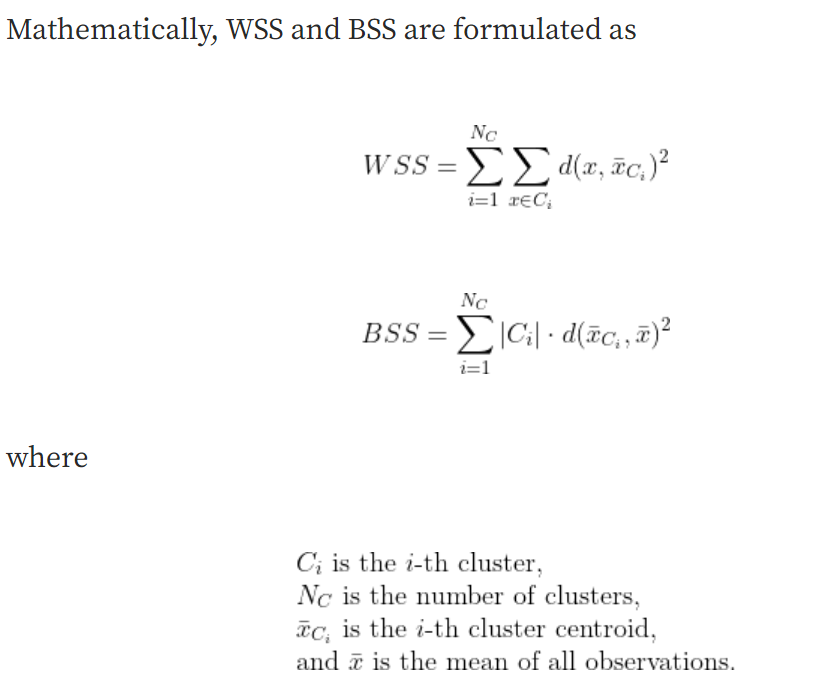

It’s easy to see that higher k corresponds to lower WSS. However, k has to be determined from the business point of view, or more objectively using what’s called the elbow method.

The elbow method says we should pick k where increasing it will result in no more significant decrease of WSS.

Given enough time, k-means will always converge. However, the convergence may be to a local minimum. This is highly dependent on the initialization of centroids. As a result, the computation is often done several times, with different initializations of centroids.

One method to help address this issue is the k-means++ initialization scheme. This initializes the centroids to be (generally) distant from each other, leading to probably better results than random initialization.

In [ ]:
X, classes = load_iris(return_X_y=True)
## Shuffle classes and data 
X,classes = shuffle(X,classes) 

In [ ]:
train_data = X[:135]  
test_data = X[135:]

In [ ]:
c1 = [float(np.random.randint(4,8)),float(np.random.randint(1,5)),
      float(np.random.randint(1,7)),float(np.random.randint(0,3))]
c2 = [float(np.random.randint(4,8)),float(np.random.randint(1,5)),
      float(np.random.randint(1,7)),float(np.random.randint(0,3))]
c3 = [float(np.random.randint(4,8)),float(np.random.randint(1,5)),
      float(np.random.randint(1,7)),float(np.random.randint(0,3))]

In [ ]:
epochs = 1
while(epochs<=100):
    cluster1 = []
    cluster2 = []
    cluster3 = []
    for point in train_data:
        dis_point_c1 = ((c1[0]-point[0])**2 + (c1[1]-point[1])**2 + (c1[2]-point[2])**2 + (c1[3]-point[3])**2)**0.5

        dis_point_c2 = ((c2[0]-point[0])**2 + (c2[1]-point[1])**2 + (c2[2]-point[2])**2 + (c2[3]-point[3])**2)**0.5

        dis_point_c3 = ((c3[0]-point[0])**2 + (c3[1]-point[1])**2 + (c3[2]-point[2])**2 + (c3[3]-point[3])**2)**0.5

        distances = [dis_point_c1,dis_point_c2,dis_point_c3]

        pos = distances.index(min(distances))

        if(pos==0):
            cluster1.append(point)
        elif(pos==1):
            cluster2.append(point)
        else:
            cluster3.append(point)

    prev_c1 = c1
    prev_c2 = c2
    prev_c3 = c3

    cluster1 = np.array(cluster1)
    cluster2 = np.array(cluster2)
    cluster3 = np.array(cluster3)

    if(len(cluster1)!=0):
        cluster1 = [sum(cluster1[:,0])/float(len(cluster1)),
                    sum(cluster1[:,1]/float(len(cluster1))),
                    sum(cluster1[:,2])/float(len(cluster1)),
                    sum(cluster1[:,3])/float(len(cluster1))]
    if(len(cluster2)!=0):
        cluster2 = [sum(cluster2[:,0])/float(len(cluster2)),
                    sum(cluster2[:,1]/float(len(cluster2))),
                    sum(cluster2[:,2])/float(len(cluster2)),
                    sum(cluster2[:,3])/float(len(cluster2))]
    if(len(cluster3)!=0):
        cluster3 = [sum(cluster3[:,0])/float(len(cluster3)),
                    sum(cluster3[:,1])/float(len(cluster3)),
                    sum(cluster3[:,2])/float(len(cluster3)),
                    sum(cluster3[:,3])/float(len(cluster3))]

    if(prev_c1 == c1 and prev_c2 == c2 and prev_c3 == c3):
        print("Converged")
        break
        
    print(epochs)
    epochs += 1

Converged


In [ ]:
pred = []
for point in test_data:
    dis_point_c1 = ((c1[0]-point[0])**2 + (c1[1]-point[1])**2 + 
                    (c1[2]-point[2])**2 + (c1[3]-point[3])**2)**0.5
    dis_point_c2 = ((c2[0]-point[0])**2 + (c2[1]-point[1])**2 + 
                    (c2[2]-point[2])**2 + (c2[3]-point[3])**2)**0.5
    dis_point_c3 = ((c3[0]-point[0])**2 + (c3[1]-point[1])**2 + 
                    (c3[2]-point[2])**2 + (c3[3]-point[3])**2)**0.5
    distances = [dis_point_c1,dis_point_c2,dis_point_c3]
    pos = distances.index(min(distances))
    pred.append(pos)
print(pred)

[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1]


In [ ]:
# Algorithm Implementation:
# 1. Choose the number of clusters(K) and obtain the data.
#
# 2. Place the centroids C1, C2, C3, C4, C5, C6....Ck randomly.
#
# 3. Repeat steps 4 and 5 until convergence or until end of a fixed number of iterations.
#
# 4. for each data point x_i:
#     
#     -find the nearest centroid(c1,c2,c3...ck).
#     -assign the point to that cluster(K).
#
# 5. for each cluster j=1,2,...k:
#       new_centroid = mean of all points assigned to that cluster.